In [1]:
events = []
with open('events.txt', 'r') as f:
    while line := f.readline():
        event = line.split(' ')
        event = [float(x) for x in event]
        if float(event[0]) >= 1:
            break
        
        events.append(event)

In [21]:
import cv2
img = cv2.imread('images\\frame_00000001.png')
print(img.shape)

(180, 240, 3)


In [3]:
import numpy as np

timestamps = []
xs = []
ys = []
polarities = []

for t, x, y, p in events:
    timestamps.append(t)
    xs.append(int(x))
    ys.append(int(y))
    polarities.append(int(p))

print(len(events))
print(timestamps[0], timestamps[-1])

print(np.min(xs), np.max(xs))
print(np.min(ys), np.max(ys))

print("Positive:", sum(polarities))
print("Negative:", len(polarities) - sum(polarities))

72045
0.0 0.999996
4 239
1 179
Positive: 31036
Negative: 41009


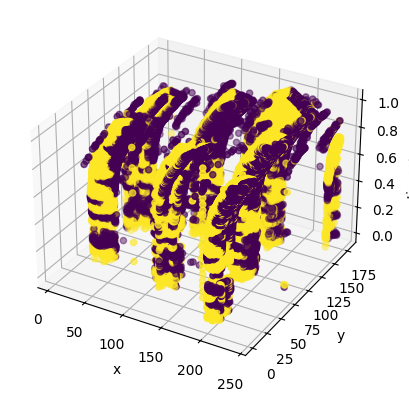

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
scater = ax.scatter3D(xs, ys, timestamps, c=polarities, cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("timestamp")

# ax.view_init(90, 0)
plt.show()

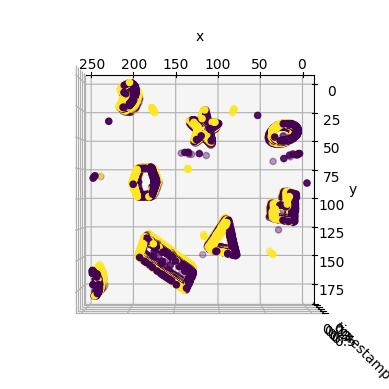

In [11]:
timestamps_8000 = timestamps[:8000]
xs_8000 = xs[:8000]
ys_8000 = ys[:8000]
polarities_8000 = polarities[:8000]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
scater = ax.scatter3D(xs_8000, ys_8000, timestamps_8000, c=polarities_8000, cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("timestamp")

ax.view_init(90, 90)
plt.show()

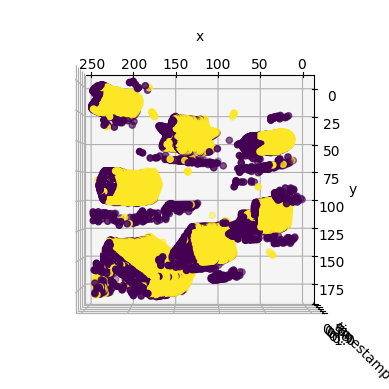

In [9]:
events_late = [event for event in events if event[0] >= 0.5 and event[0] <= 1]

timestamps_late = []
xs_late = []
ys_late= []
polarities_late = []

for t, x, y, p in events_late:
    timestamps_late.append(t)
    xs_late.append(int(x))
    ys_late.append(int(y))
    polarities_late.append(int(p))

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
scater = ax.scatter3D(xs_late, ys_late, timestamps_late, c=polarities_late, cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("timestamp")

ax.view_init(90, 90)
plt.show()

1. about 0.5s
2. 0.000055 - 0.00004
3. Time of acquisition
4. positive or negative change in pixel value reaching a fixed threshold
5. Towards positive x values

# Event Frame

In [24]:
import cv2
import numpy as np

events = []
timestamps = []
xs = []
ys = []
polarities = []
with open('events.txt', 'r') as f:
    while line := f.readline():
        event = line.split(' ')
        event = [float(x) for x in event]
        if event[0] < 1:
            continue
        elif event[0] > 2:
            break

        events.append(event)
        timestamps.append(events[0])
        xs.append(int(event[1]))
        ys.append(int(event[2]))
        polarities.append(int(event[3]))

polarities = [-1 if p == 0 else 1 for p in polarities]

In [18]:
print(polarities[:5])

[1, 1, 1, -1, -1]


In [35]:
def event_frame(xs, ys, polarities, img_shape):
    image = np.full(img_shape, 127).astype(np.uint8)
    coords = zip(xs, ys)
    for i, (x, y) in enumerate(coords):        
        if polarities[i] > 0:
            image[y, x] = 255
        else:               
            image[y, x] = 0     ###TODO: maybe [y, x] ?

    return image

# img = event_frame()

In [39]:
IMG_SHAPE = (180, 240)

tau = 0.01  
events_temp = []
for event in events:

    events_temp.append(event)
    
    if events_temp[-1][0] - events_temp[0][0] > tau:
        xs_temp = [int(event[1]) for event in events_temp]
        ys_temp = [int(event[2]) for event in events_temp]
        polarities_temp = [int(event[3]) for event in events_temp]
        img = event_frame(xs_temp, ys_temp, polarities_temp, IMG_SHAPE)
        cv2.imshow("frame", img)
        cv2.waitKey(10)
        events_temp = []

        

: 

with smaller tau we can see object movement, big tau makes the objects more blurry